In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df= pd.read_csv("bmw.csv")
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Cheaking the shape of the data(no of rows and columns)

In [31]:
df.shape

(10781, 9)

In [32]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

Checking the null value

In [33]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [34]:
df.drop(df[df['engineSize']==0.].index,inplace=True)

In [35]:
df['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [36]:
df['fuelType'].unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

Petrol cars in every model

In [37]:
petrol_cars= df[df['fuelType']=='Petrol'].groupby('model').size()
print(petrol_cars)
print('Total Petrol Cars:', petrol_cars.sum())

model
1 Series    857
2 Series    649
3 Series    567
4 Series    313
5 Series    158
6 Series     23
7 Series     22
8 Series     22
M2           21
M3           27
M4          125
M5           29
M6            8
X1          174
X2          141
X3           81
X4           24
X5           33
X6           19
X7            6
Z3            7
Z4          108
dtype: int64
Total Petrol Cars: 3414


Diesel cars in every model

In [38]:
diesel_cars= df[df['fuelType']=='Diesel'].groupby('model').size()
print(diesel_cars)
print('Total Diesel Cars:', diesel_cars.sum())

model
1 Series    1107
2 Series     539
3 Series    1760
4 Series     682
5 Series     806
6 Series      85
7 Series      81
8 Series      17
X1           630
X2           147
X3           464
X4           155
X5           409
X6            87
X7            49
dtype: int64
Total Diesel Cars: 7018


Hybrid cars in every model

In [39]:
hybrid_cars=df[df['fuelType']=='Hybrid'].groupby('model').size()
print(hybrid_cars)
print('Total Hybrid Cars:', hybrid_cars.sum())

model
2 Series    36
3 Series    91
5 Series    91
7 Series     3
X3           6
X5          22
i8          16
dtype: int64
Total Hybrid Cars: 265


Electric cars in every model

In [40]:
electric_cars=df[df['fuelType']=='Electric'].groupby('model').size()
print(electric_cars)
print('Total Electric Cars:', electric_cars.sum())

model
i3    1
dtype: int64
Total Electric Cars: 1


Other fuel type cars in every model

In [41]:
other_cars=df[df['fuelType']=='Other'].groupby('model').size()
print(other_cars)   
print('Total Other Cars:', other_cars.sum())

model
2 Series     3
3 Series    21
5 Series     1
X5           3
i3           7
i8           1
dtype: int64
Total Other Cars: 36


Distribution of Fuel Types

C:\Users\supri\AppData\Local\Temp\ipykernel_3612\2466619839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='colorblind')


Text(0.5, 1.0, 'Distribution of Fuel Types')

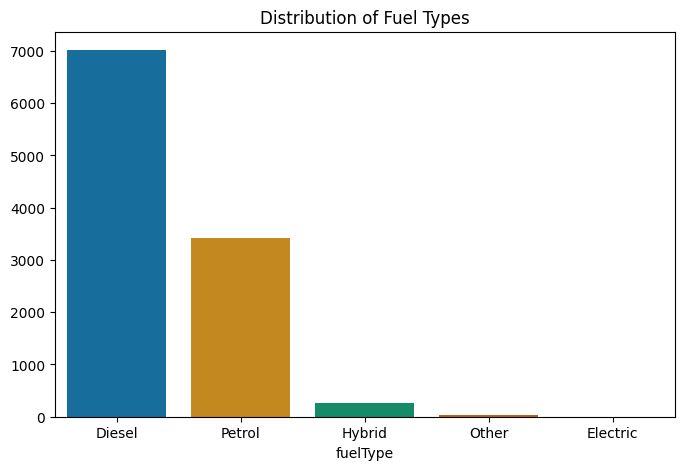

In [42]:
fuel_counts = df['fuelType'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='colorblind')
plt.title('Distribution of Fuel Types')

In [43]:
df['transmission'].value_counts()

transmission
Semi-Auto    4666
Automatic    3546
Manual       2522
Name: count, dtype: int64

Distribution of transmission

C:\Users\supri\AppData\Local\Temp\ipykernel_3612\2047527358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='colorblind')


<Axes: xlabel='transmission'>

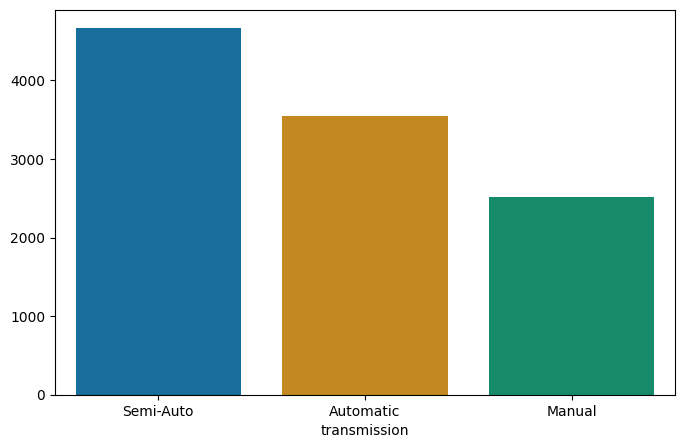

In [44]:
transmission_counts = df['transmission'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='colorblind')

Year vs prize

C:\Users\supri\AppData\Local\Temp\ipykernel_3612\157107570.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='price', marker='*',ci=None)


Text(0.5, 1.0, 'Price Trend Over Years')

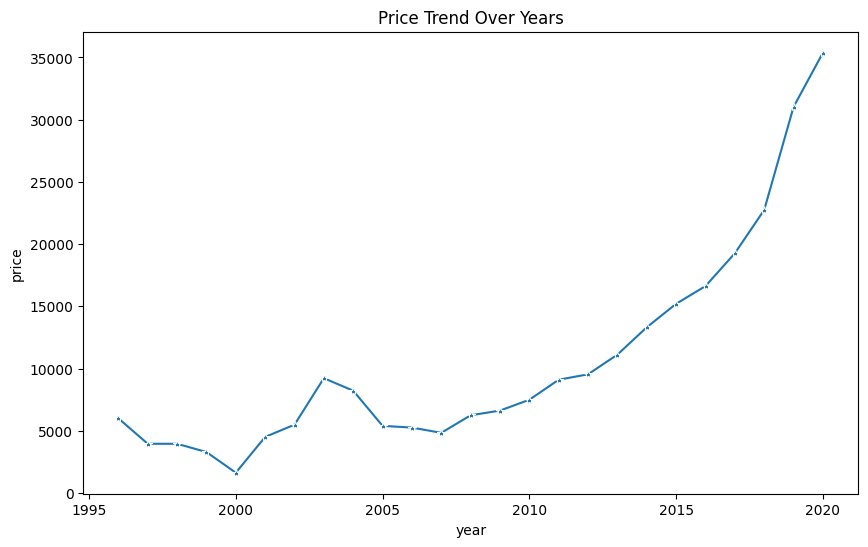

In [45]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='price', marker='*',ci=None)
plt.title('Price Trend Over Years')

In [46]:
df['engineSize'].unique()

array([2. , 3. , 1.5, 0.6, 1.6, 4.4, 2.2, 2.5, 4. , 3.2, 1. , 5. , 1.9,
       6.6, 2.8, 3.5])

In [47]:
df[df['mpg'] > 400]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6
8188,i3,2015,14940,Automatic,59000,Other,0,470.8,0.6
8620,i3,2017,19300,Automatic,32867,Other,0,470.8,0.6
8835,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0
10080,i3,2017,20000,Automatic,19178,Other,0,470.8,0.6
10086,i3,2017,19500,Automatic,23956,Other,135,470.8,0.6
10325,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6
10530,i3,2017,17600,Automatic,50867,Other,135,470.8,0.6


In [48]:
df['iselectric'] = df['fuelType'].isin(['Electric', 'Other'])

filtering the electic and other fuel type categories

C:\Users\supri\AppData\Local\Temp\ipykernel_3612\1808402124.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_non_electric, x='engineSize',y='mpg',ci=None)


Text(0.5, 1.0, 'MPG by Engine Size')

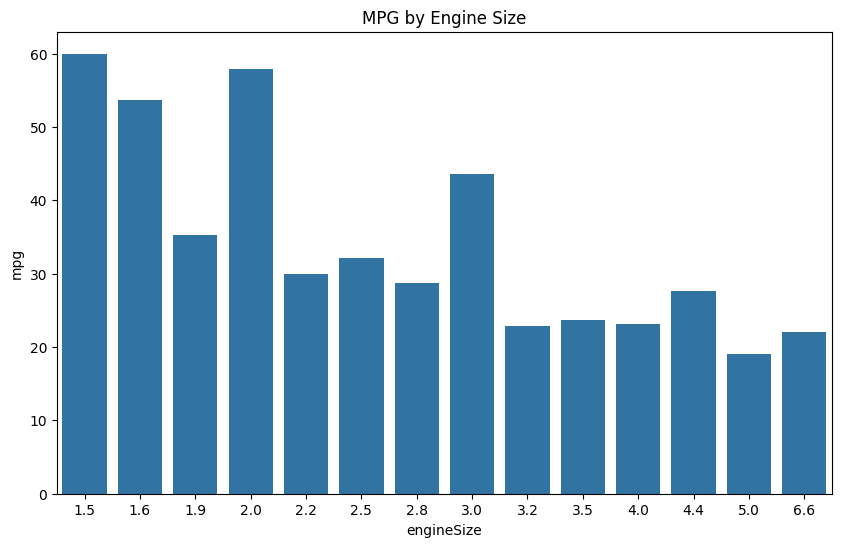

In [49]:
df_non_electric = df[df['iselectric']==False]
plt.figure(figsize=(10,6))
sns.barplot(data=df_non_electric, x='engineSize',y='mpg',ci=None)
plt.title('MPG by Engine Size')

car model to average price

C:\Users\supri\AppData\Local\Temp\ipykernel_3612\983638256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_average_price.index, y=car_average_price.values,palette='grey')


<Axes: xlabel='model'>

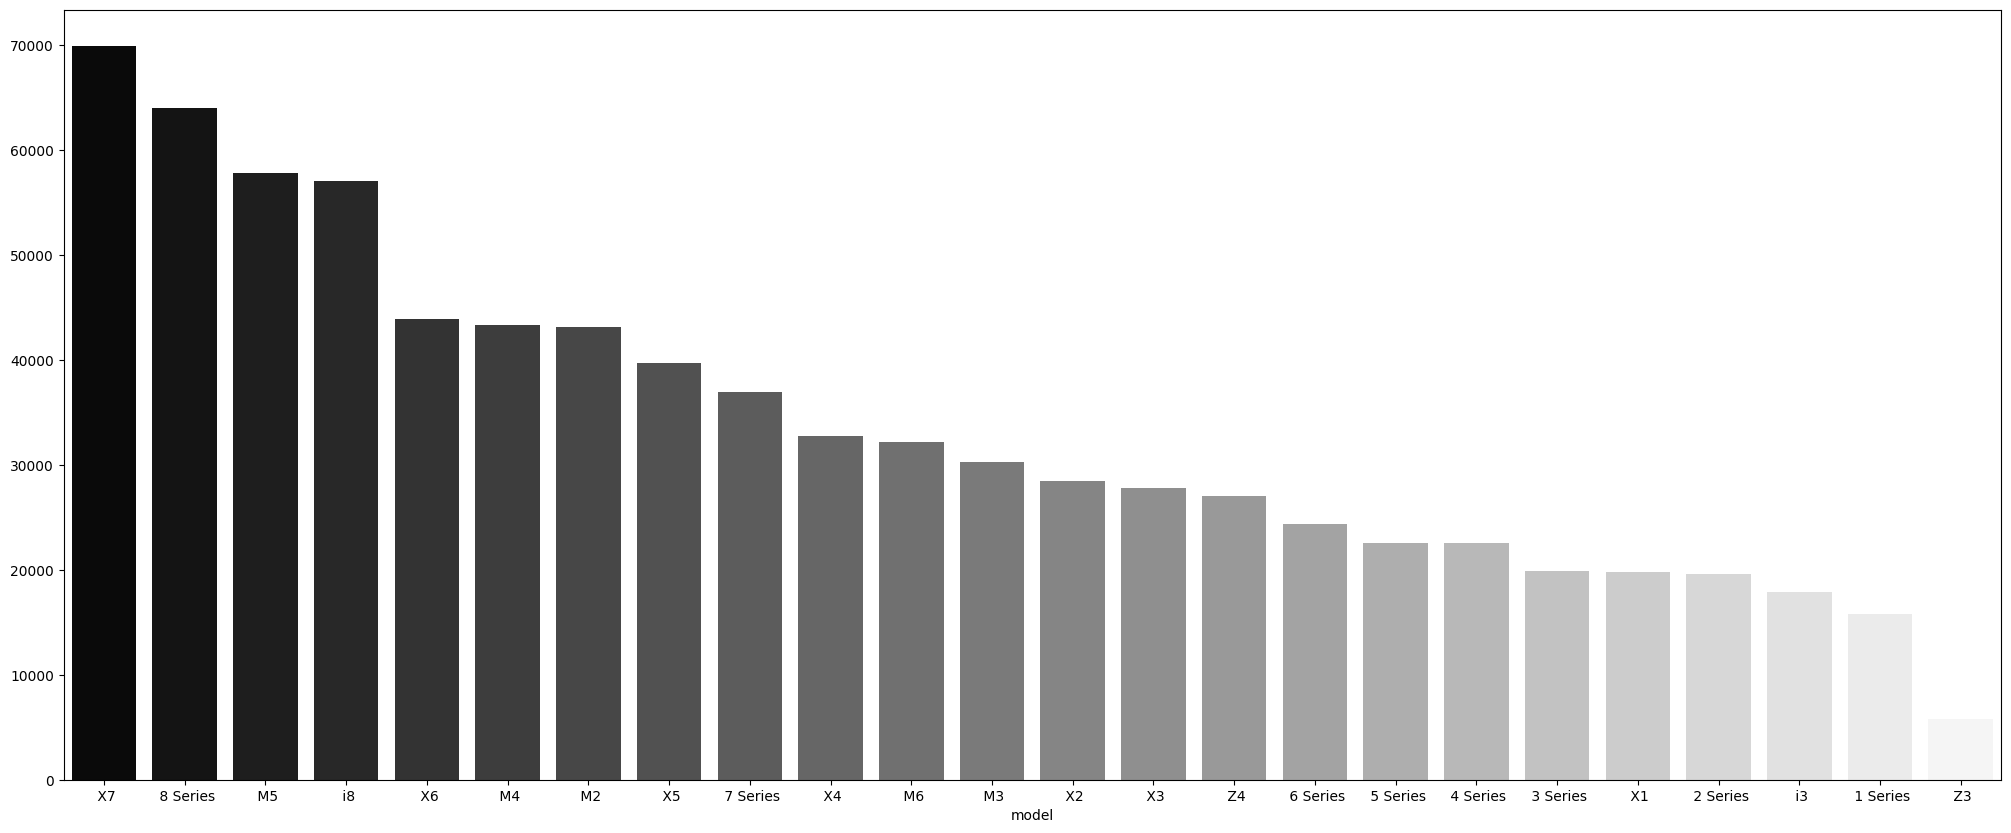

In [50]:
car_average_price = df.groupby('model')['price'].mean().sort_values(ascending=False)    
plt.figure(figsize=(25,10))
sns.barplot(x=car_average_price.index, y=car_average_price.values,palette='grey')

Price Distibution

Text(0, 0.5, 'Frequency')

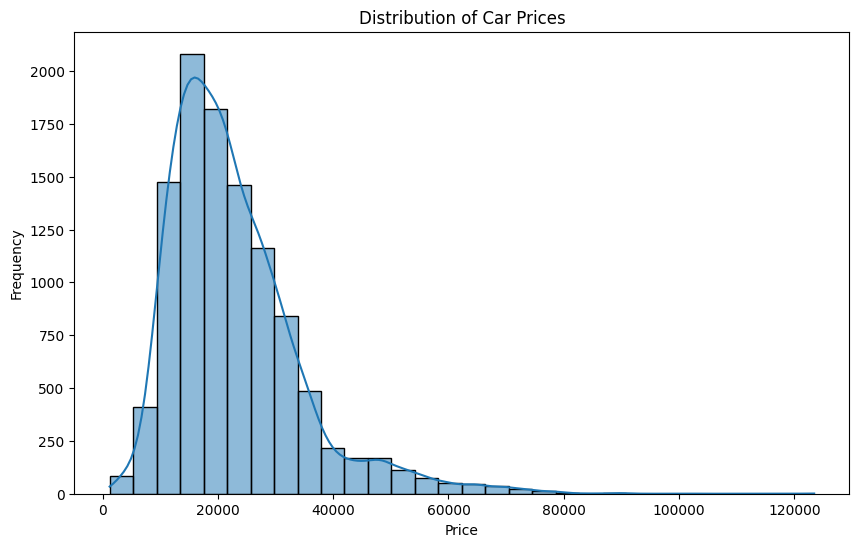

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')


Milage Distribution

Text(0, 0.5, 'Count')

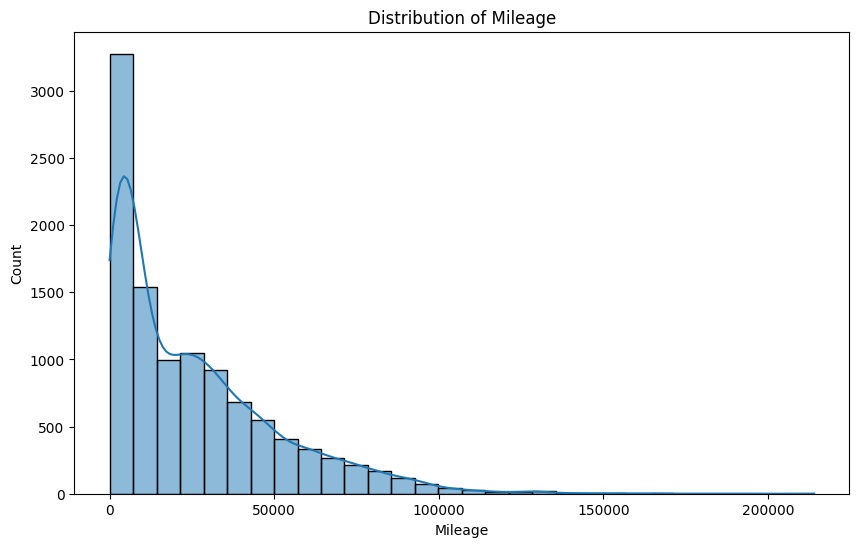

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['mileage'], kde=True, bins=30)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Count')


Correlation Heatmap

Text(0.5, 1.0, 'Correlation Between Numerical Features')

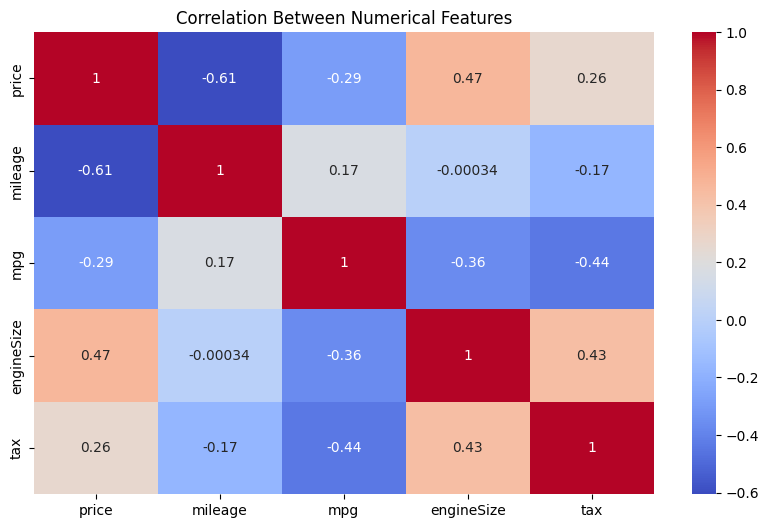

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['price','mileage','mpg','engineSize','tax']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')


Average price by Transmisson Type

C:\Users\supri\AppData\Local\Temp\ipykernel_3612\172235452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='transmission', y='price',palette='colorblind')


Text(0.5, 1.0, 'Average Price by Transmission Type')

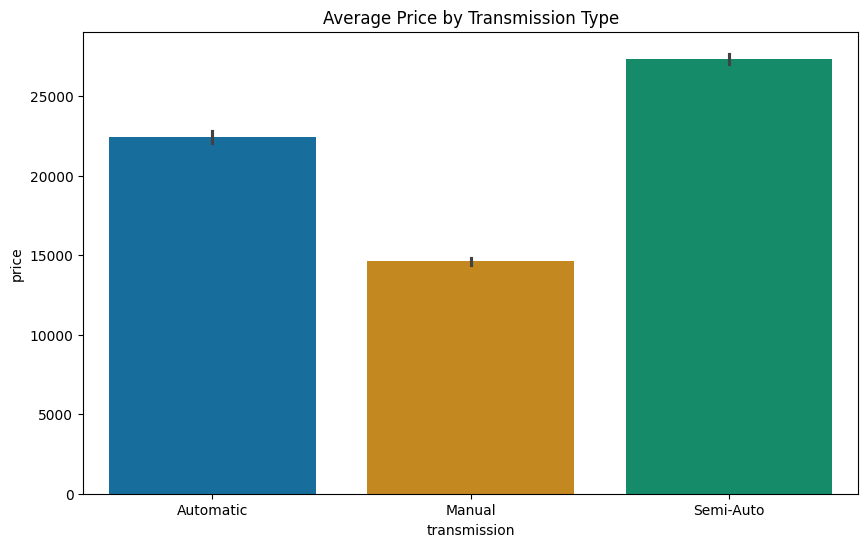

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='transmission', y='price',palette='colorblind')
plt.title('Average Price by Transmission Type')


Top 5 Expensive Car Models

C:\Users\supri\AppData\Local\Temp\ipykernel_3612\2316699456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive.index, y=top_expensive.values,palette='grey')


Text(0, 0.5, 'Average Price')

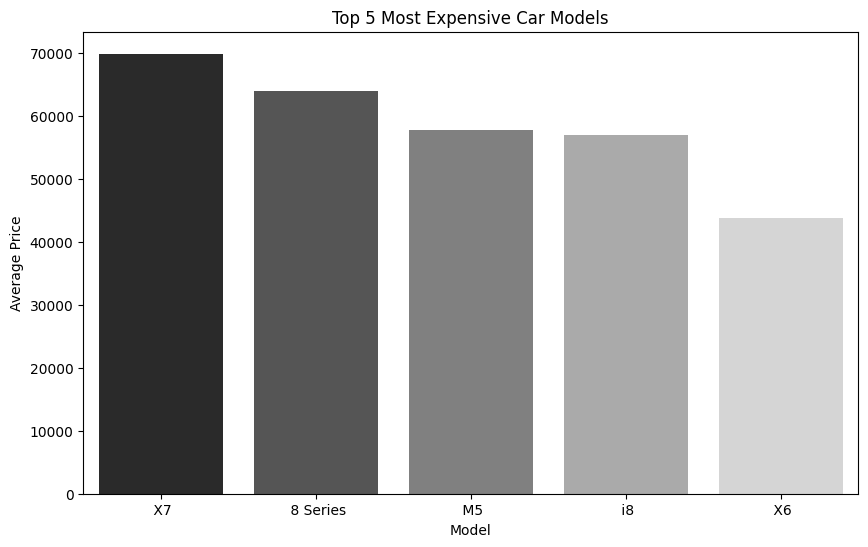

In [55]:
top_expensive = df.groupby('model')['price'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_expensive.index, y=top_expensive.values,palette='grey')
plt.title('Top 5 Most Expensive Car Models')
plt.xlabel('Model')
plt.ylabel('Average Price')